In [1]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split

In [2]:
#Reading csv file into a DataFrame

df = pd.read_csv("voterfile.csv")

In [3]:
#First 5 rows of the DataFrame

df.head()

,optimus_id,age,party,ethnicity,maritalstatus,dwellingtype,income,education,cd,dma,...,intrst_musical_instruments_in_hh,donates_to_liberal_causes,donates_to_conservative_causes,home_owner_or_renter,g08_precinct_turnout,g10_precinct_turnout,g12_precinct_turnout,p08_precinct_turnout,p10_precinct_turnout,p12_precinct_turnout
0,861681,69.0,Republican,European,Married,Single Family Dwelling Unit,75k-125k,Bach Degree - Extremely Likely,4.0,LAS VEGAS DMA (EST.),...,NaN,NaN,NaN,Likely Homeowner,0.56,0.54,0.75,0.17,0.32,0.24
1,1084850,20.0,American Independent,European,NaN,NaN,Unknown,NaN,2.0,RENO DMA (EST.),...,NaN,NaN,NaN,NaN,0.84,0.82,0.92,0.47,0.62,0.47
2,644435,28.0,Non-Partisan,European,NaN,NaN,Unknown,NaN,3.0,LAS VEGAS DMA (EST.),...,NaN,NaN,NaN,NaN,0.49,0.34,0.70,0.04,0.09,0.06
3,57683,78.0,American Independent,European,Married,NaN,Unknown,NaN,3.0,LAS VEGAS DMA (EST.),...,NaN,NaN,NaN,NaN,0.84,0.79,0.91,0.24,0.46,0.30
4,167371,68.0,Democratic,NaN,NaN,NaN,Unknown,NaN,4.0,LAS VEGAS DMA (EST.),...,NaN,NaN,NaN,NaN,0.71,0.66,0.81,0.19,0.37,0.34


In [4]:
#Dimensionality of the DataFrame

df.shape

(50000, 39)

In [5]:
#All the columns in DataFrame

df.columns

Index(['optimus_id', 'age', 'party', 'ethnicity', 'maritalstatus',
       'dwellingtype', 'income', 'education', 'cd', 'dma',
       'occupationindustry', 'vh14p', 'vh12g', 'vh12p', 'vh10g', 'vh10p',
       'vh08g', 'vh08p', 'vh06g', 'vh06p', 'vh04g', 'vh04p', 'vh02g', 'vh02p',
       'vh00g', 'vh00p', 'net_worth', 'petowner_dog', 'intrst_nascar_in_hh',
       'intrst_musical_instruments_in_hh', 'donates_to_liberal_causes',
       'donates_to_conservative_causes', 'home_owner_or_renter',
       'g08_precinct_turnout', 'g10_precinct_turnout', 'g12_precinct_turnout',
       'p08_precinct_turnout', 'p10_precinct_turnout', 'p12_precinct_turnout'],
      dtype='object')

In [6]:
#Indexes of all the columns in the DataFrame

dic = {}

for i in df.columns:
    dic[i] = df.columns.get_loc(i)
    
print(dic)

{'optimus_id': 0, 'age': 1, 'party': 2, 'ethnicity': 3, 'maritalstatus': 4, 'dwellingtype': 5, 'income': 6, 'education': 7, 'cd': 8, 'dma': 9, 'occupationindustry': 10, 'vh14p': 11, 'vh12g': 12, 'vh12p': 13, 'vh10g': 14, 'vh10p': 15, 'vh08g': 16, 'vh08p': 17, 'vh06g': 18, 'vh06p': 19, 'vh04g': 20, 'vh04p': 21, 'vh02g': 22, 'vh02p': 23, 'vh00g': 24, 'vh00p': 25, 'net_worth': 26, 'petowner_dog': 27, 'intrst_nascar_in_hh': 28, 'intrst_musical_instruments_in_hh': 29, 'donates_to_liberal_causes': 30, 'donates_to_conservative_causes': 31, 'home_owner_or_renter': 32, 'g08_precinct_turnout': 33, 'g10_precinct_turnout': 34, 'g12_precinct_turnout': 35, 'p08_precinct_turnout': 36, 'p10_precinct_turnout': 37, 'p12_precinct_turnout': 38}


### Preprocessing Data (handle missing data, feature engineering, etc.) on Each Columns

In [7]:
#Checking if any columns have null values

df.isnull().any()

optimus_id                          False
age                                  True
party                               False
ethnicity                            True
maritalstatus                        True
dwellingtype                         True
income                              False
education                            True
cd                                   True
dma                                 False
occupationindustry                   True
vh14p                               False
vh12g                               False
vh12p                               False
vh10g                               False
vh10p                               False
vh08g                               False
vh08p                               False
vh06g                               False
vh06p                               False
vh04g                               False
vh04p                               False
vh02g                               False
vh02p                             

In [8]:
#Getting the count of null values of all columns

df.isna().sum()

optimus_id                              0
age                                    17
party                                   0
ethnicity                            5192
maritalstatus                       30638
dwellingtype                        26083
income                                  0
education                           22410
cd                                      4
dma                                     0
occupationindustry                  41808
vh14p                                   0
vh12g                                   0
vh12p                                   0
vh10g                                   0
vh10p                                   0
vh08g                                   0
vh08p                                   0
vh06g                                   0
vh06p                                   0
vh04g                                   0
vh04p                                   0
vh02g                                   0
vh02p                             

<AxesSubplot:>

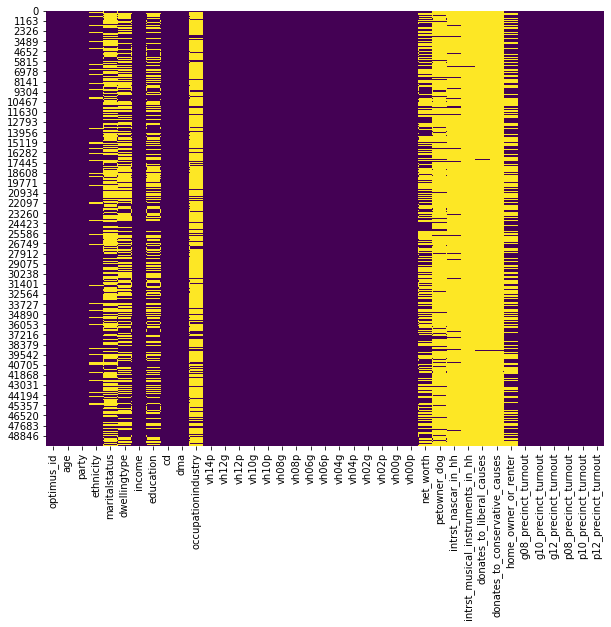

In [9]:
#Heatmap to see where exactly the Nan values are

plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')

In [10]:
#If more than 40% of a column's values are NaN, we drop those columns. 
#We are doing this because if majority of the values in a column are NaN, it would be difficult to perform data 
#imputation on them and training the model with too many imputed values can lead to faulty results.

perc = 40.0
min_count =  int(((100 - perc) / 100) * df.shape[0] + 1)
df = df.dropna(axis = 1, thresh = min_count)

In [11]:
#Dimensionality of the updated DataFrame

df.shape

(50000, 28)

In [12]:
#Getting the count of null values of all columns after dropping columns with more than 40% NaN values

df.isna().sum()

optimus_id                 0
age                       17
party                      0
ethnicity               5192
income                     0
cd                         4
dma                        0
vh14p                      0
vh12g                      0
vh12p                      0
vh10g                      0
vh10p                      0
vh08g                      0
vh08p                      0
vh06g                      0
vh06p                      0
vh04g                      0
vh04p                      0
vh02g                      0
vh02p                      0
vh00g                      0
vh00p                      0
g08_precinct_turnout       1
g10_precinct_turnout       1
g12_precinct_turnout       1
p08_precinct_turnout       1
p10_precinct_turnout       1
p12_precinct_turnout       1
dtype: int64

<AxesSubplot:>

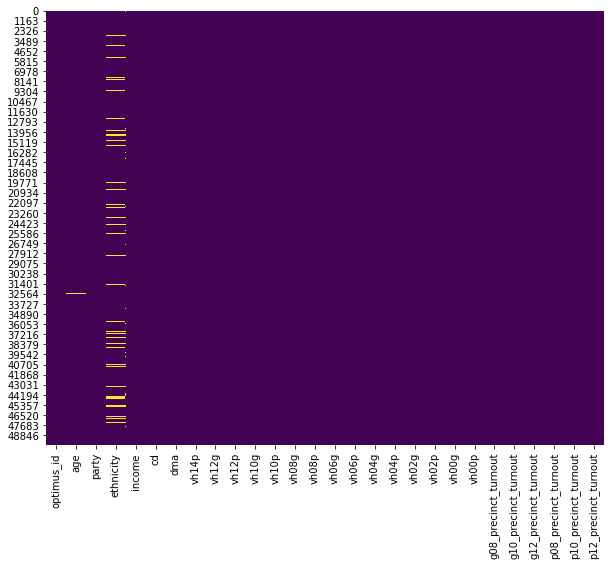

In [13]:
#Heatmap to see where exactly the Nan values are

plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')

In [14]:
#'European' is the mode value / most frequent value in the 'ethnicity' column

df.ethnicity.value_counts()

European            33594
Hispanic             7952
Asian                1272
Other                1014
African-American      976
Name: ethnicity, dtype: int64

In [15]:
#Imputing / Replacing the NaN values with the Mode value in the 'ethnicity' column

df['ethnicity'] = df['ethnicity'].fillna(df['ethnicity'].mode()[0])

In [16]:
#Updated ethnicity count

df.ethnicity.value_counts()

European            38786
Hispanic             7952
Asian                1272
Other                1014
African-American      976
Name: ethnicity, dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

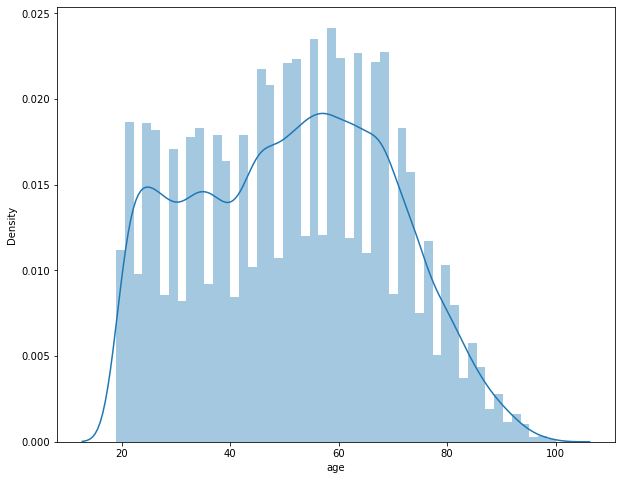

In [17]:
#Distribution plot for deciding imputation technique for 'age' column

fig, ax = plt.subplots(figsize = (10, 8))
sns.distplot(df.age)

In [18]:
#Median of 'age' column

df["age"].median()

52.0

In [19]:
#Replacing Nan value with 52(median of 'age' column)

df["age"] = df["age"].fillna(52)

In [20]:
#Updated count of null values of all columns

df.isna().sum()

optimus_id              0
age                     0
party                   0
ethnicity               0
income                  0
cd                      4
dma                     0
vh14p                   0
vh12g                   0
vh12p                   0
vh10g                   0
vh10p                   0
vh08g                   0
vh08p                   0
vh06g                   0
vh06p                   0
vh04g                   0
vh04p                   0
vh02g                   0
vh02p                   0
vh00g                   0
vh00p                   0
g08_precinct_turnout    1
g10_precinct_turnout    1
g12_precinct_turnout    1
p08_precinct_turnout    1
p10_precinct_turnout    1
p12_precinct_turnout    1
dtype: int64

In [21]:
#Dropping rows containing NaN values

df.dropna(inplace=True)

In [22]:
#No NaN values in any column

df.isna().sum()

optimus_id              0
age                     0
party                   0
ethnicity               0
income                  0
cd                      0
dma                     0
vh14p                   0
vh12g                   0
vh12p                   0
vh10g                   0
vh10p                   0
vh08g                   0
vh08p                   0
vh06g                   0
vh06p                   0
vh04g                   0
vh04p                   0
vh02g                   0
vh02p                   0
vh00g                   0
vh00p                   0
g08_precinct_turnout    0
g10_precinct_turnout    0
g12_precinct_turnout    0
p08_precinct_turnout    0
p10_precinct_turnout    0
p12_precinct_turnout    0
dtype: int64

In [23]:
#Dimensionality of the updated DataFrame

df.shape

(49995, 28)

### Encoding of categorical data

In [24]:
df.party.value_counts()

Democratic              19898
Republican              17297
Non-Partisan             9624
American Independent     2338
Other                     424
Libertarian               380
Green                      32
Natural Law                 2
Name: party, dtype: int64

In [25]:
#Encoding 'party' column

party_encode = {'Democratic' : 1, 'Republican' : 2, 'Non-Partisan' : 3, 'American Independent' : 4, 'Libertarian' : 5, 'Green' : 6, 'Natural Law' : 7, 'Other' : 8}
df['party'] = df['party'].map(party_encode)
df.head()

,optimus_id,age,party,ethnicity,income,cd,dma,vh14p,vh12g,vh12p,...,vh02g,vh02p,vh00g,vh00p,g08_precinct_turnout,g10_precinct_turnout,g12_precinct_turnout,p08_precinct_turnout,p10_precinct_turnout,p12_precinct_turnout
0,861681,69.0,2,European,75k-125k,4.0,LAS VEGAS DMA (EST.),0,0,0,...,1,0,1,0,0.56,0.54,0.75,0.17,0.32,0.24
1,1084850,20.0,4,European,Unknown,2.0,RENO DMA (EST.),0,0,0,...,0,0,0,0,0.84,0.82,0.92,0.47,0.62,0.47
2,644435,28.0,3,European,Unknown,3.0,LAS VEGAS DMA (EST.),0,0,0,...,0,0,0,0,0.49,0.34,0.70,0.04,0.09,0.06
3,57683,78.0,4,European,Unknown,3.0,LAS VEGAS DMA (EST.),0,0,0,...,0,0,0,0,0.84,0.79,0.91,0.24,0.46,0.30
4,167371,68.0,1,European,Unknown,4.0,LAS VEGAS DMA (EST.),0,0,0,...,1,1,1,1,0.71,0.66,0.81,0.19,0.37,0.34


In [26]:
df.ethnicity.value_counts()

European            38781
Hispanic             7952
Asian                1272
Other                1014
African-American      976
Name: ethnicity, dtype: int64

In [27]:
#Encoding 'ethnicity' column

ethnicity_encode = {'European' : 1, 'Hispanic' : 2, 'Asian' : 3, 'African-American' : 4, 'Other' : 5}
df['ethnicity'] = df['ethnicity'].map(ethnicity_encode)
df.head()

,optimus_id,age,party,ethnicity,income,cd,dma,vh14p,vh12g,vh12p,...,vh02g,vh02p,vh00g,vh00p,g08_precinct_turnout,g10_precinct_turnout,g12_precinct_turnout,p08_precinct_turnout,p10_precinct_turnout,p12_precinct_turnout
0,861681,69.0,2,1,75k-125k,4.0,LAS VEGAS DMA (EST.),0,0,0,...,1,0,1,0,0.56,0.54,0.75,0.17,0.32,0.24
1,1084850,20.0,4,1,Unknown,2.0,RENO DMA (EST.),0,0,0,...,0,0,0,0,0.84,0.82,0.92,0.47,0.62,0.47
2,644435,28.0,3,1,Unknown,3.0,LAS VEGAS DMA (EST.),0,0,0,...,0,0,0,0,0.49,0.34,0.70,0.04,0.09,0.06
3,57683,78.0,4,1,Unknown,3.0,LAS VEGAS DMA (EST.),0,0,0,...,0,0,0,0,0.84,0.79,0.91,0.24,0.46,0.30
4,167371,68.0,1,1,Unknown,4.0,LAS VEGAS DMA (EST.),0,0,0,...,1,1,1,1,0.71,0.66,0.81,0.19,0.37,0.34


In [28]:
df.income.value_counts()

Unknown      19596
35k-75k      11435
75k-125k      9414
0-35k         4186
125k-200k     3689
200k+         1675
Name: income, dtype: int64

In [29]:
#Encoding 'income' column

income_encode = {'Unknown' : 0, '0-35k' : 1, '35k-75k' : 2, '75k-125k' : 3, '125k-200k' : 4, '200k+' : 5}
df['income'] = df['income'].map(income_encode)
df.head()

,optimus_id,age,party,ethnicity,income,cd,dma,vh14p,vh12g,vh12p,...,vh02g,vh02p,vh00g,vh00p,g08_precinct_turnout,g10_precinct_turnout,g12_precinct_turnout,p08_precinct_turnout,p10_precinct_turnout,p12_precinct_turnout
0,861681,69.0,2,1,3,4.0,LAS VEGAS DMA (EST.),0,0,0,...,1,0,1,0,0.56,0.54,0.75,0.17,0.32,0.24
1,1084850,20.0,4,1,0,2.0,RENO DMA (EST.),0,0,0,...,0,0,0,0,0.84,0.82,0.92,0.47,0.62,0.47
2,644435,28.0,3,1,0,3.0,LAS VEGAS DMA (EST.),0,0,0,...,0,0,0,0,0.49,0.34,0.70,0.04,0.09,0.06
3,57683,78.0,4,1,0,3.0,LAS VEGAS DMA (EST.),0,0,0,...,0,0,0,0,0.84,0.79,0.91,0.24,0.46,0.30
4,167371,68.0,1,1,0,4.0,LAS VEGAS DMA (EST.),0,0,0,...,1,1,1,1,0.71,0.66,0.81,0.19,0.37,0.34


In [30]:
df.dma.value_counts()

LAS VEGAS DMA (EST.)         35443
RENO DMA (EST.)              13563
SALT LAKE CITY DMA (EST.)      962
LOS ANGELES DMA (EST.)          27
Name: dma, dtype: int64

In [31]:
#Encoding 'dma' column

dma_encode = {'LAS VEGAS DMA (EST.)' : 1, 'RENO DMA (EST.)' : 2, 'SALT LAKE CITY DMA (EST.)' : 3, 'LOS ANGELES DMA (EST.)' : 4}
df['dma'] = df['dma'].map(dma_encode)
df.head()

,optimus_id,age,party,ethnicity,income,cd,dma,vh14p,vh12g,vh12p,...,vh02g,vh02p,vh00g,vh00p,g08_precinct_turnout,g10_precinct_turnout,g12_precinct_turnout,p08_precinct_turnout,p10_precinct_turnout,p12_precinct_turnout
0,861681,69.0,2,1,3,4.0,1,0,0,0,...,1,0,1,0,0.56,0.54,0.75,0.17,0.32,0.24
1,1084850,20.0,4,1,0,2.0,2,0,0,0,...,0,0,0,0,0.84,0.82,0.92,0.47,0.62,0.47
2,644435,28.0,3,1,0,3.0,1,0,0,0,...,0,0,0,0,0.49,0.34,0.70,0.04,0.09,0.06
3,57683,78.0,4,1,0,3.0,1,0,0,0,...,0,0,0,0,0.84,0.79,0.91,0.24,0.46,0.30
4,167371,68.0,1,1,0,4.0,1,0,0,0,...,1,1,1,1,0.71,0.66,0.81,0.19,0.37,0.34


In [32]:
#Since there is no use of keeping 'age' and 'cd' as float64, we are converting to 'int64'

df['age'] = df['age'].astype(np.int64)
df['cd'] = df['cd'].astype(np.int64)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49995 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   optimus_id            49995 non-null  int64  
 1   age                   49995 non-null  int64  
 2   party                 49995 non-null  int64  
 3   ethnicity             49995 non-null  int64  
 4   income                49995 non-null  int64  
 5   cd                    49995 non-null  int64  
 6   dma                   49995 non-null  int64  
 7   vh14p                 49995 non-null  int64  
 8   vh12g                 49995 non-null  int64  
 9   vh12p                 49995 non-null  int64  
 10  vh10g                 49995 non-null  int64  
 11  vh10p                 49995 non-null  int64  
 12  vh08g                 49995 non-null  int64  
 13  vh08p                 49995 non-null  int64  
 14  vh06g                 49995 non-null  int64  
 15  vh06p              

### Feature Selection

In [34]:
X = df.drop("vh14p", axis = 1) #X = Independent variables
Y = df["vh14p"] #Y = Dependent variable

In [35]:
#Splitting train and test data

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size = 0.3,
    random_state = 0)

X_train.shape, X_test.shape

((34996, 27), (14999, 27))

<AxesSubplot:>

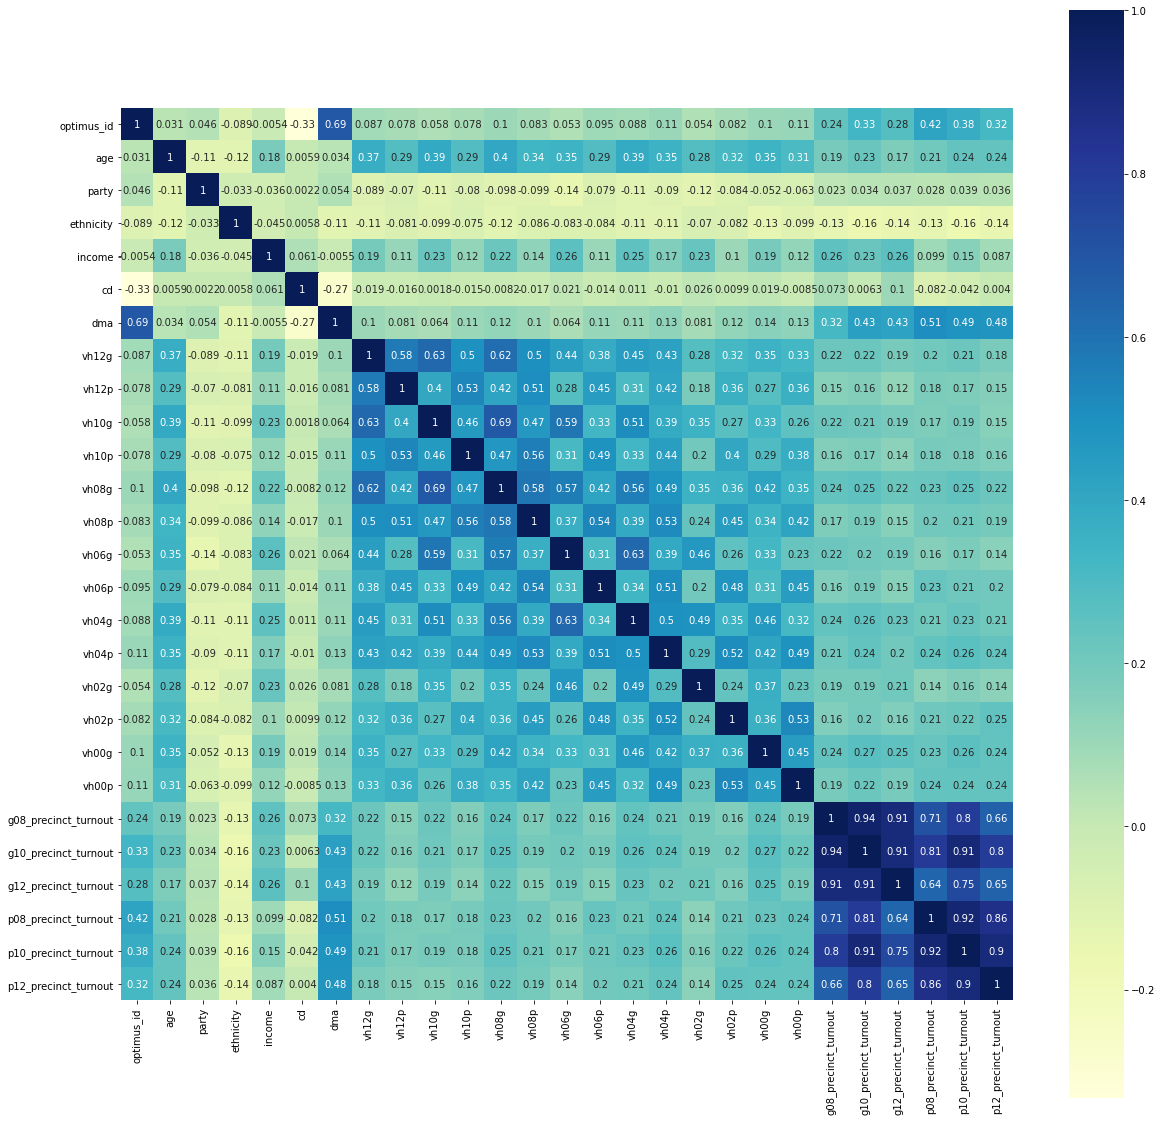

In [36]:
#Correlation heatmap for training independent variables

cor = X_train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(data = cor, square = True, cmap="YlGnBu", annot=True)

In [37]:
#Function that returns highly correlated features. If 2 features are highly correlated, it returns only one feature
#among them. The threshold is passed as an input parameter.

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [38]:
corr_features = correlation(X_train, 0.75)
len(set(corr_features))

5

In [39]:
corr_features

{'g10_precinct_turnout',
 'g12_precinct_turnout',
 'p08_precinct_turnout',
 'p10_precinct_turnout',
 'p12_precinct_turnout'}

In [40]:
#Dropping the 'corr_features'


X_train.drop(corr_features, axis = 1, inplace = True)
X_test.drop(corr_features, axis = 1, inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [41]:
X_train.head()

,optimus_id,age,party,ethnicity,income,cd,dma,vh12g,vh12p,vh10g,...,vh08p,vh06g,vh06p,vh04g,vh04p,vh02g,vh02p,vh00g,vh00p,g08_precinct_turnout
4149,876170,61,2,1,0,2,2,1,1,1,...,1,1,1,1,1,1,0,1,1,0.71
33426,84278,38,1,4,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0.45
3002,933343,86,1,1,1,2,2,1,1,1,...,1,1,1,1,1,1,1,1,0,0.60
6974,749613,71,1,1,3,3,1,0,0,0,...,0,0,0,1,1,1,0,1,0,0.66
37946,202557,26,3,1,4,4,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0.61


In [42]:
X_test.head()

,optimus_id,age,party,ethnicity,income,cd,dma,vh12g,vh12p,vh10g,...,vh08p,vh06g,vh06p,vh04g,vh04p,vh02g,vh02p,vh00g,vh00p,g08_precinct_turnout
38090,981895,22,2,1,0,2,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0.69
18939,336810,71,2,1,3,4,1,0,0,1,...,0,1,0,1,0,1,0,0,0,0.78
7838,602738,55,2,1,2,3,1,0,0,1,...,1,1,0,1,1,1,0,0,0,0.67
14178,903103,22,1,1,0,2,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0.56
8016,433087,47,1,4,0,4,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0.49


In [43]:
#Dropping the 'corr_features' from the whole DataFrame

df.drop(corr_features, axis = 1, inplace = True)

In [44]:
df.head()

,optimus_id,age,party,ethnicity,income,cd,dma,vh14p,vh12g,vh12p,...,vh08p,vh06g,vh06p,vh04g,vh04p,vh02g,vh02p,vh00g,vh00p,g08_precinct_turnout
0,861681,69,2,1,3,4,1,0,0,0,...,0,1,0,1,0,1,0,1,0,0.56
1,1084850,20,4,1,0,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0.84
2,644435,28,3,1,0,3,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0.49
3,57683,78,4,1,0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.84
4,167371,68,1,1,0,4,1,0,0,0,...,1,1,1,1,1,1,1,1,1,0.71


In [45]:
df_new = df.copy()

In [46]:
df_new.reset_index(drop = True)

,optimus_id,age,party,ethnicity,income,cd,dma,vh14p,vh12g,vh12p,...,vh08p,vh06g,vh06p,vh04g,vh04p,vh02g,vh02p,vh00g,vh00p,g08_precinct_turnout
0,861681,69,2,1,3,4,1,0,0,0,...,0,1,0,1,0,1,0,1,0,0.56
1,1084850,20,4,1,0,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0.84
2,644435,28,3,1,0,3,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0.49
3,57683,78,4,1,0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.84
4,167371,68,1,1,0,4,1,0,0,0,...,1,1,1,1,1,1,1,1,1,0.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49990,251398,23,4,1,4,3,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0.68
49991,684299,24,1,1,2,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0.50
49992,369815,28,3,1,2,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0.45
49993,276455,49,2,1,3,4,1,0,0,1,...,0,1,0,1,0,1,1,1,0,0.52


In [47]:
#Saving the DataFrame as a csv

df_new.to_csv('cleaned_data.csv', index=False)